**Identification**

To identify the Cardio Vascular Disease

**IMPORT DRIVE**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**IMPORT LIBRARIES**

In [2]:
#visuvalization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn
import sklearn

**READ THE PATH OF THE**

In [4]:
data = pd.read_csv("/content/drive/MyDrive/cardiovascular-disease.csv")

In [5]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Checking if there's NULL value in any of the cells.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


There are no missing values

In [7]:
data.isnull().sum(axis = 0)

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

The patients age is written in days, so we're converting it to years and rounding it to the nearest 2 decimals. Also we're replacing the gender column with another two-columns, one for male and the other is for female. If the patients' gender is male then a value of 1 will be inside the male column and zero inside the female column and vice-versa.

In [8]:
data.insert(3, "female", (data['gender']==1).astype(int))
data.insert(4, 'male', (data['gender']==2).astype(int))
data.drop(['gender', 'id'], axis=1, inplace=True)

Down here, we're calculating the patient BMI (Body Mass Index) using the formula which is:  weight/height^2
 
In our dataset, the height of patients were in centimeters so we divided it by 100 to convert it into meters.

In [9]:
data.insert(5, 'bmi', round((data['weight']/(data['height']/100)**2), 2)) 

In [10]:
data.describe()

,age,female,male,height,weight,bmi,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,0.650429,0.349571,164.359229,74.205690,27.556545,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,0.476838,8.210126,14.395757,6.091405,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,0.000000,0.000000,55.000000,10.000000,3.470000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,0.000000,0.000000,159.000000,65.000000,23.880000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,0.000000,165.000000,72.000000,26.375000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,1.000000,1.000000,170.000000,82.000000,30.220000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,1.000000,1.000000,250.000000,200.000000,298.670000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


The mean age for patients is 53.
The percentage of males is 35.
The percentage of females is 65.
The percentage of smokers is 8.
The percentage of alcoholists is 5.
The percentage of patients who do sports is 80





It seems there are many outliers in body mass index, may be it's a mistake. So, lets drop outliers

In [11]:
data.drop(data.query('bmi >60 or bmi <15').index, axis=0, inplace=True)

In [12]:
from sklearn.model_selection import train_test_split

we created a function that adds a column called bp_cat (Blood Pressure Category). This function scans two columns of each row which are the ap_hi and ap_lo then based on the values of these columns it categorizes the patients blood pressure as Normal, Elevated, High Blood Pressure Stage 1, High Blood Pressure Stage 2 or Hypertensive Crisis.

In [13]:
def BPCategorize(x,y):
    if x<=120 and y<=80:
        return 'normal'
    elif x<=129 and y<=80:
        return 'elevated'
    elif x<=139 or y<=89:
        return 'high 1'
    elif x<=180 or y<=120:
        return "high 2"
    elif x>180 or y>120:
        return 'high 3'
    else:
        return None
    
data.insert(8, "bp_cat", data.apply(lambda row: BPCategorize(row['ap_hi'], row['ap_lo']), axis=1))
data['bp_cat'].value_counts()

normal      39008
high 1      15380
high 2      15023
elevated      419
high 3         77
Name: bp_cat, dtype: int64

We can also drop outliers from blood pressure variables

In [14]:
data.drop(data.query('ap_hi >220 or ap_lo >180 or ap_hi<40 or ap_lo<40').index, axis=0, inplace=True)

In [15]:
data.head()

,age,female,male,height,weight,bmi,ap_hi,ap_lo,bp_cat,cholesterol,gluc,smoke,alco,active,cardio
0,18393,0,1,168,62.0,21.97,110,80,normal,1,1,0,0,1,0
1,20228,1,0,156,85.0,34.93,140,90,high 2,3,1,0,0,1,1
2,18857,1,0,165,64.0,23.51,130,70,high 1,3,1,0,0,0,1
3,17623,0,1,169,82.0,28.71,150,100,high 2,1,1,0,0,1,1
4,17474,1,0,156,56.0,23.01,100,60,normal,1,1,0,0,0,0


we've finished cleaning and sorting our dataset according to our needs.

visualizing of cases occurs according to the age

In [16]:
from matplotlib import rcParams

In [17]:
data['years'] = (data['age'] / 360).round().astype('int')

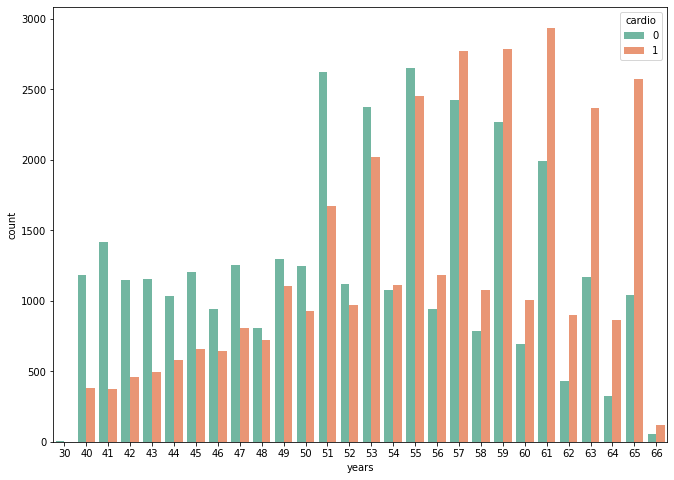

In [18]:
rcParams['figure.figsize'] = 11, 8
sns.countplot(x='years', hue='cardio', data = data, palette="Set2");

visualizing of cases occurs according to the gender

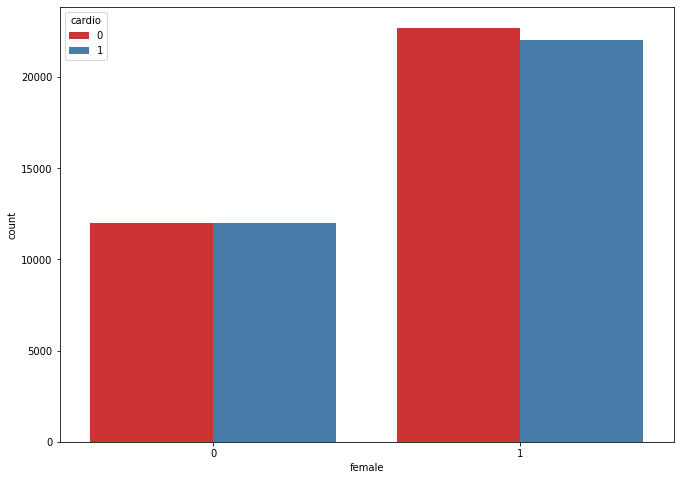

In [19]:
rcParams['figure.figsize'] = 11, 8
sns.countplot(x='female', hue='cardio', data = data, palette="Set1");

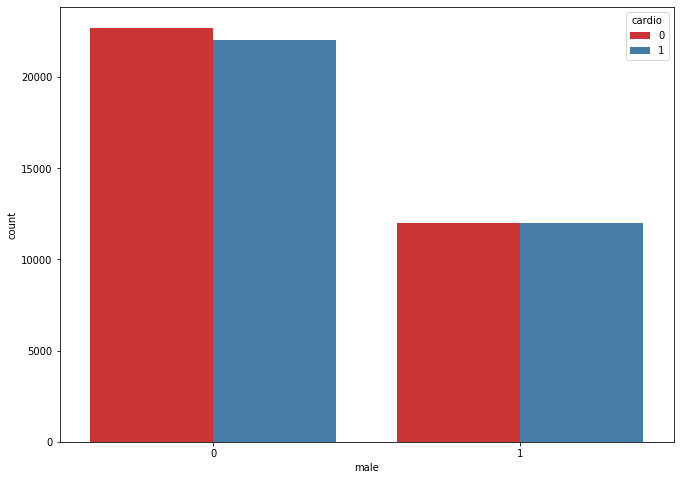

In [20]:
rcParams['figure.figsize'] = 11, 8
sns.countplot(x='male', hue='cardio', data = data, palette="Set1");

How many Smokers and Non-Smokers

In [21]:
num = data["smoke"].value_counts("0")
num

0    0.911965
1    0.088035
Name: smoke, dtype: float64

In [22]:
num_ns = 70000 * 0.911871
num_s = 70000 * 0.088129

print(f"There are  {int(num_ns)}  Non-Smokers and  {int(num_s)}  Smokers in the data set.")

There are  63830  Non-Smokers and  6169  Smokers in the data set.


we're defining a variable of standard and unique color for the visualization to avoid distraction to the user.For that import seaborn package.


In [23]:
import seaborn as sb

In [24]:
base_color = sb.color_palette()[0]

In [25]:
def gender(x, y):
    if x==1:
        return 'female'
    else:
        return 'male'

''

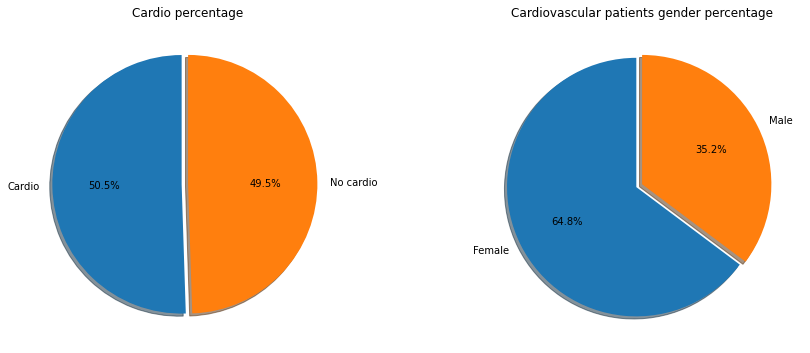

In [26]:
fig, ax = plt.subplots(1,2, figsize=(14,20))
plt.tight_layout(pad=10)
ax[0].pie(x=data['cardio'].value_counts(), labels=['Cardio', 'No cardio'],autopct='%1.1f%%', shadow=True, startangle=90, explode=(0.05,0.0))
ax[0].title.set_text('Cardio percentage')
gender = data.query("cardio == 1").apply(lambda row: gender(row['female'], row['male']), axis=1).value_counts()
ax[1].pie(x=gender, labels=['Female', 'Male'],autopct='%1.1f%%', shadow=True, startangle=90, explode=(0.05,0.0))
ax[1].title.set_text('Cardiovascular patients gender percentage')
;

The percentage of people with cardiovascular diseases is 50%.
The percentage of males with cardiovascular diseases is 35.3%.
The percentage of females with cardiovascular diseases is 64.7%.

making boxplots to compare the age and body mass index for the cardio and non-cardio patients.

Text(0.5, 69.0, '')

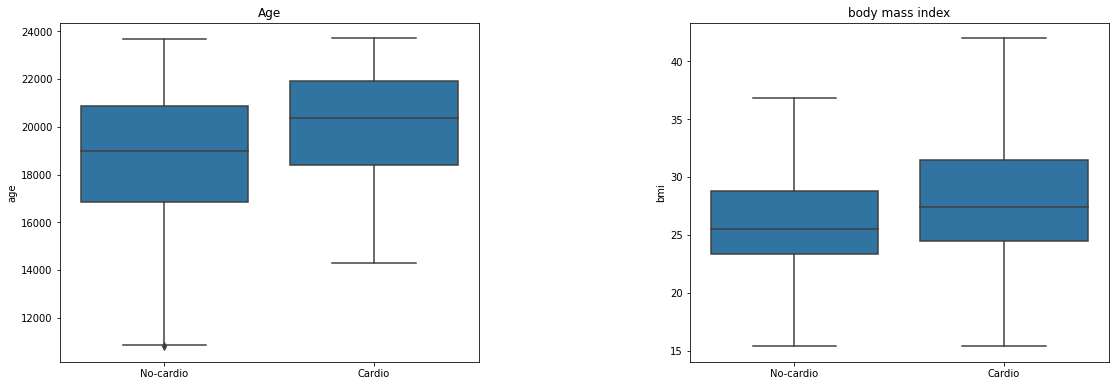

In [27]:
fig, ax = plt.subplots(ncols=2, figsize=(20,10))
plt.tight_layout(pad=18)
sb.boxplot(data=data, x='cardio', y='age', ax=ax[0], color=base_color)
sb.boxplot(data=data, x='cardio', y='bmi', showfliers=False, ax=ax[1], color=base_color)
ax[0].title.set_text('Age')
ax[0].set_xticklabels(['No-cardio', 'Cardio'])
ax[1].title.set_text('body mass index')
ax[1].set_xticklabels(['No-cardio', 'Cardio'])
ax[0].set_xlabel("")
ax[1].set_xlabel("")

A relation is found between the age of people and cardiovascular diseases, thus, elderly people are most likely to have this kind of diseases.
Another relation is found between the BMI and cardiovascular diseases, thus, people with higher BMI are also most likely to to have this kind of diseases.

Probability that a person has cardio diseases given that he is 50 or older

In [28]:
data_age_50 = data.query('age >=50')
data_agy_50_cardio = data_age_50.query('cardio==1')
round(data_agy_50_cardio.shape[0]*100/data_age_50.shape[0],2)

49.49

Probability that a person drinks alcohol or smokes

In [29]:
data_cohol_smoke = data.query("alco==1 or smoke==1")
print(data_cohol_smoke.shape[0]*100/data.shape[0])

11.524964689779694


 A person has cardio diseases given that the patient drinks alcohol or smokes

In [30]:
data_cohol_smoke_cadrio = data_cohol_smoke.query('cardio==1')
data_cohol_smoke_cadrio.shape[0]*100/data_cohol_smoke.shape[0]

47.95957043588124

In [31]:
a=data.drop("bp_cat",axis=1)
a.head()

,age,female,male,height,weight,bmi,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
0,18393,0,1,168,62.0,21.97,110,80,1,1,0,0,1,0,51
1,20228,1,0,156,85.0,34.93,140,90,3,1,0,0,1,1,56
2,18857,1,0,165,64.0,23.51,130,70,3,1,0,0,0,1,52
3,17623,0,1,169,82.0,28.71,150,100,1,1,0,0,1,1,49
4,17474,1,0,156,56.0,23.01,100,60,1,1,0,0,0,0,49


In [32]:
data = pd.read_csv("/content/drive/MyDrive/cardiovascular-disease.csv")

In [33]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [34]:
data=data.drop("id", axis=1)

In [35]:
data.isnull().sum(axis = 0)

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [36]:
X=data.drop("cardio", axis=1)
X.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,18393,2,168,62.0,110,80,1,1,0,0,1
1,20228,1,156,85.0,140,90,3,1,0,0,1
2,18857,1,165,64.0,130,70,3,1,0,0,0
3,17623,2,169,82.0,150,100,1,1,0,0,1
4,17474,1,156,56.0,100,60,1,1,0,0,0


In [37]:
Y=data["cardio"]
Y.head()


0    0
1    1
2    1
3    1
4    0
Name: cardio, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [41]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

In [42]:
classifier.fit(X_train, y_train)

GaussianNB()

In [43]:
y_pred  =  classifier.predict(X_test)

In [44]:
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [45]:
y_test.head()

10840    0
56267    0
14849    0
62726    0
47180    0
Name: cardio, dtype: int64

In [46]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [47]:
ac = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred)

In [48]:
ac

0.5891428571428572

In [49]:
cm

array([[6331,  738],
       [5014, 1917]])

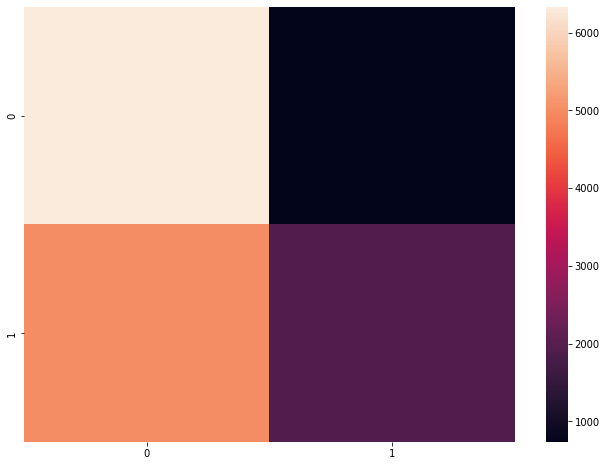

In [50]:
seaborn.heatmap(cm)

In [51]:
from sklearn.neighbors import KNeighborsClassifier as KNN

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
knn = KNN(n_neighbors = 3)

In [53]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [54]:
print('Model is Created')

Model is Created


In [55]:
y_pred = knn.predict(X_test)

y_pred

array([0, 0, 0, ..., 1, 0, 1])

In [56]:
ac = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred)

In [57]:
ac

0.6640714285714285

In [58]:
cm

array([[4781, 2288],
       [2415, 4516]])

In [59]:
X = data.drop('cardio',axis=1)
y = data.cardio
X

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,18393,2,168,62.0,110,80,1,1,0,0,1
1,20228,1,156,85.0,140,90,3,1,0,0,1
2,18857,1,165,64.0,130,70,3,1,0,0,0
3,17623,2,169,82.0,150,100,1,1,0,0,1
4,17474,1,156,56.0,100,60,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1
69996,22601,1,158,126.0,140,90,2,2,0,0,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0
69998,22431,1,163,72.0,135,80,1,2,0,0,0


In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13)

In [61]:
from xgboost import XGBClassifier

In [62]:
xgb = XGBClassifier(learning_rate = 0.00292, n_estimators = 2900, max_depth= 7, random_state=13)

In [63]:
xgb.fit(X_train, y_train)


XGBClassifier(learning_rate=0.00292, max_depth=7, n_estimators=2900,
              random_state=13)

In [64]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix
y_pred = xgb.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.4f%%" % (accuracy * 100.0))

Accuracy: 73.2400%
